<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_4X/blob/main/Generate_groupwise_4X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generating random numbers from a uniform distribution
https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781787125698/12/ch25lvl1sec126/generating-random-numbers-from-a-uniform-distribution

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import random
import statsmodels.api as sm
%matplotlib inline
from google.colab import files
import math

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sp.random.seed(314157)

In [31]:
n=20
rep=0
table_data_all=pd.DataFrame({"rep":[]})
for i in range(1000):
    data = pd.DataFrame({"X1" : sp.random.uniform(20, 100, n),
                         "X2" : sp.random.uniform(20, 100, n),
                         "X3" : sp.random.uniform(20, 100, n),
                         "X4" : sp.random.uniform(20, 100, n)})
    table_data = data.copy()

    table_data.loc[:math.floor(n/2),"e"] = table_data.loc[:math.floor(n/2),"X2"].apply(lambda X2: np.random.normal(0, math.sqrt(0.1)))
    table_data.loc[math.floor(n/2):,"e"] = table_data.loc[math.floor(n/2):,"X2"].apply(lambda X2: np.random.normal(0, math.sqrt(0.9)))
    # display(table_data.loc[:math.floor(n/2),"e"])
    # display(table_data.loc[math.floor(n/2):,"e"])
    # ==========================================

    # table_data = data_new.copy()


    table_data["Y"] = 10 + table_data["X1"] + table_data["X2"] + table_data["X3"] + table_data["X4"] + table_data["e"]
    
    table_data=table_data.reset_index(drop=True).reset_index()
    table_data["rep"]=rep
    new_data = table_data.copy()

    # ==========================================
    x = new_data[["X1", "X2", "X3", "X4"]]
    y = new_data["Y"]
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    y_pred = model.predict(x)

    df = pd.DataFrame({"Actual": y, "Predicted": y_pred})

    table_data_new = pd.DataFrame({"x1"    : new_data["X1"],
                                   "x2"    : new_data["X2"],
                                   "x3"    : new_data["X3"],
                                   "x4"    : new_data["X4"],
                                   "e"     : new_data["e"],
                                   "Y"     : df["Actual"],
                                   "y_hat" : df["Predicted"]})
    table_data_new["e_hat"] = table_data_new["Y"] - table_data_new["y_hat"]
    table_data_new["rep"] = rep
    table_data_new = table_data_new.reset_index()
    table_data_new
    # ==========================================
    table_data_all=pd.concat([table_data_all,table_data_new],axis=0,ignore_index=True,sort=False)
    rep+=1
    if rep==1000:
      break
table_data_all=table_data_all.set_index(["rep", "index"])
table_data_all

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    20.576637  76.024232  67.066480  88.282887 -0.158879  261.791357   
      1.0    45.152384  88.892153  91.133863  69.290395  0.065212  304.534008   
      2.0    31.417271  44.273060  69.867181  95.829555  0.720275  252.107342   
      3.0    68.258350  76.459160  40.799554  60.942273 -0.108470  256.350866   
      4.0    68.308275  94.550857  90.148574  37.775008 -0.029944  300.752769   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.200909  63.936296  56.043692  69.980640 -0.641664  222.519873   
      16.0   76.580215  55.732009  38.253253  68.498213  0.006189  249.069879   
      17.0   32.433411  64.334236  93.152689  69.568100  0.460708  269.949144   
      18.0   70.288278  56.288806  26.627096  43.231983 -0.997448  205.438715   
      19.0   27.627257  24.130116  44.941665  59.194333 -0.650827  165.242544   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    262.934414 -1.143057  
      1.0    304.490538  0.043469  
      2.0    252.101620  0.005722  
      3.0    256.726288 -0.375421  
      4.0    300.102554  0.650215  
...                 ...       ...  
999.0 15.0   223.114952 -0.595079  
      16.0   248.744179  0.325700  
      17.0   269.389585  0.559559  
      18.0   206.281792 -0.843077  
      19.0   165.799979 -0.557435  

[20000 rows x 8 columns]

In [10]:
tablenew0 = table_data_all.loc[0.0]
tablenew1 = table_data_all.loc[1.0]
tablenew2 = table_data_all.loc[2.0]
tablenew3 = table_data_all.loc[3.0]
tablenew4 = table_data_all.loc[4.0]
tablenew5 = table_data_all.loc[5.0]
tablenew6 = table_data_all.loc[6.0]
tablenew7 = table_data_all.loc[7.0]
tablenew8 = table_data_all.loc[8.0]
tablenew9 = table_data_all.loc[9.0]

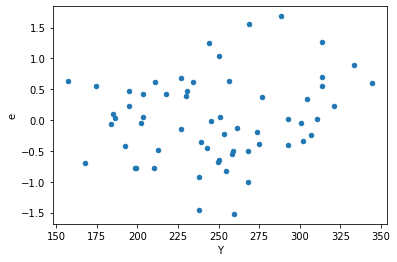

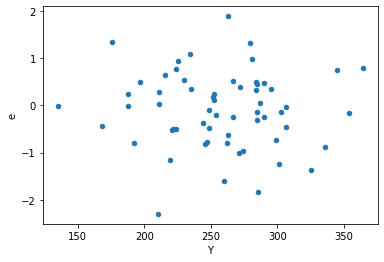

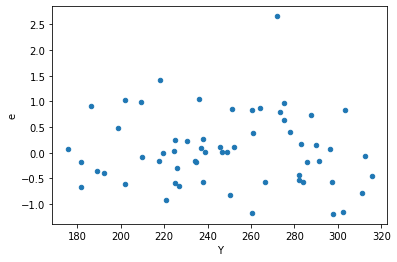

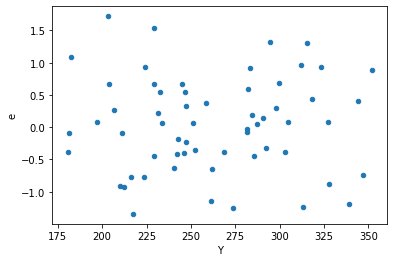

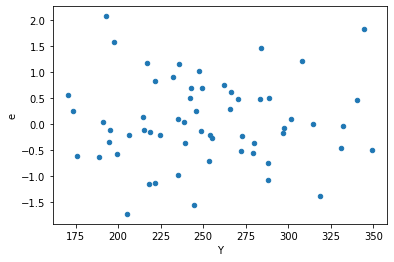

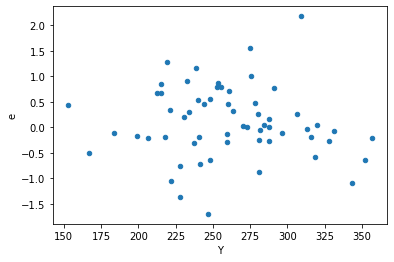

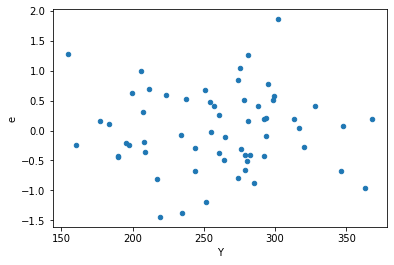

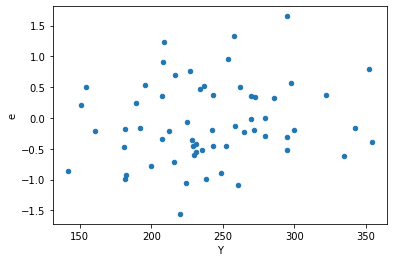

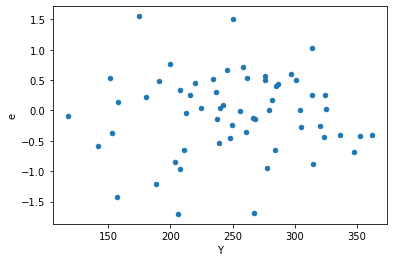

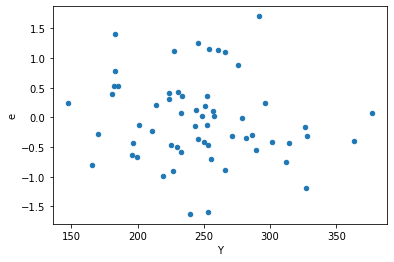

In [11]:
tablenew0.plot(x ='Y', y='e', kind = 'scatter')
tablenew1.plot(x ='Y', y='e', kind = 'scatter')
tablenew2.plot(x ='Y', y='e', kind = 'scatter')
tablenew3.plot(x ='Y', y='e', kind = 'scatter')
tablenew4.plot(x ='Y', y='e', kind = 'scatter')
tablenew5.plot(x ='Y', y='e', kind = 'scatter')
tablenew6.plot(x ='Y', y='e', kind = 'scatter')
tablenew7.plot(x ='Y', y='e', kind = 'scatter')
tablenew8.plot(x ='Y', y='e', kind = 'scatter')
tablenew9.plot(x ='Y', y='e', kind = 'scatter')

In [32]:
table_data_all.to_csv('data_groupwise_0.1_0.9_n20.csv')
files.download('data_groupwise_0.1_0.9_n20.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>